In [1]:
!pip install prophet pandas matplotlib


In [4]:
import pandas as pd

# Create a sample sales dataset
data = {
    'ds': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'y': [200 + i*0.5 + (i%10)*5 for i in range(100)]  # includes trend + seasonality
}

df = pd.DataFrame(data)
df.head()


,ds,y
0,2023-01-01,200.0
1,2023-01-02,205.5
2,2023-01-03,211.0
3,2023-01-04,216.5
4,2023-01-05,222.0


In [5]:
from prophet import Prophet

# Create and fit the model
model = Prophet()
model.fit(df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jucaard/_j314g14.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6jucaard/d0dg2as3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15278', 'data', 'file=/tmp/tmp6jucaard/_j314g14.json', 'init=/tmp/tmp6jucaard/d0dg2as3.json', 'output', 'file=/tmp/tmp6jucaard/prophet_modelujni39o_/prophet_model-20250708153127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:31:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
# Create future dates for 30 days
future = model.make_future_dataframe(periods=30)

# Make predictions
forecast = model.predict(future)

# Show forecast data
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
125,2023-05-06,288.225880,270.770712,306.608848
126,2023-05-07,288.797321,271.081331,307.476348
127,2023-05-08,290.962440,272.048512,307.213665
128,2023-05-09,291.538346,273.616587,309.688208
129,2023-05-10,289.894889,273.002480,306.980655


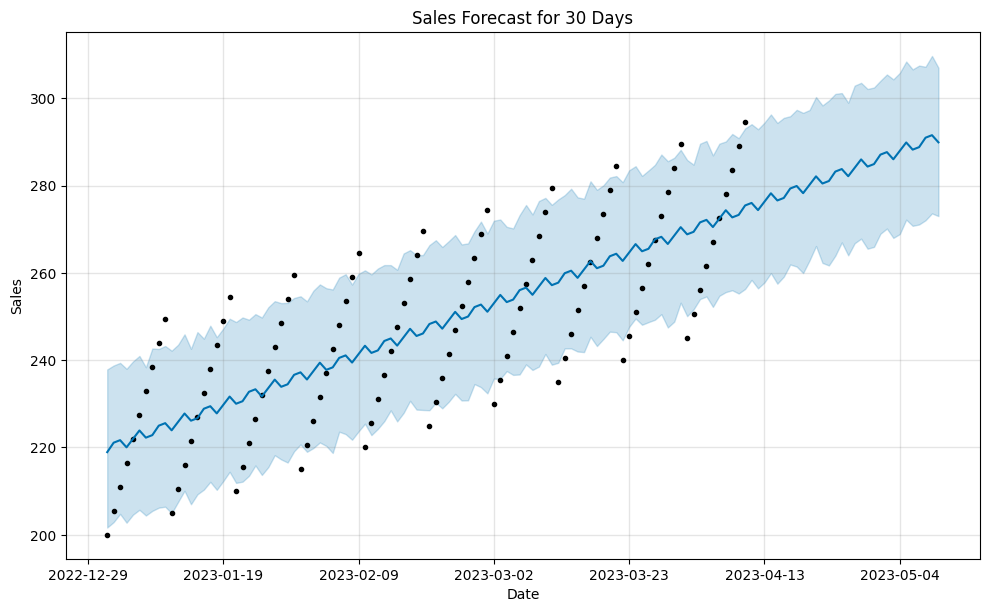

In [7]:
import matplotlib.pyplot as plt

# Forecast graph
model.plot(forecast)
plt.title("Sales Forecast for 30 Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


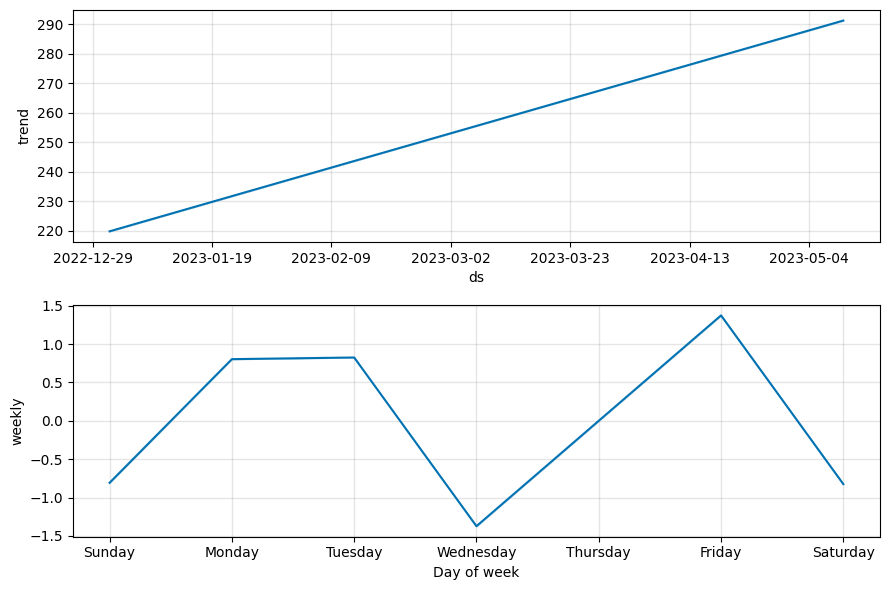

In [8]:
# Show trend + seasonality
model.plot_components(forecast)
plt.show()
